<a href="https://colab.research.google.com/github/Shahidul2/ML-practices/blob/main/Medical_Insurance_Cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting medical insurance cost using Linear Regression

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and visualization

In [ ]:
#loading the dataset
df = pd.read_csv('/content/insurance.csv')
#overview
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# number of rows and columns
df.shape

(1338, 7)

In [ ]:
#brief information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features- Sex, Smoke, Region

In [ ]:
#statistical measures
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-6-1d3bda172d99>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


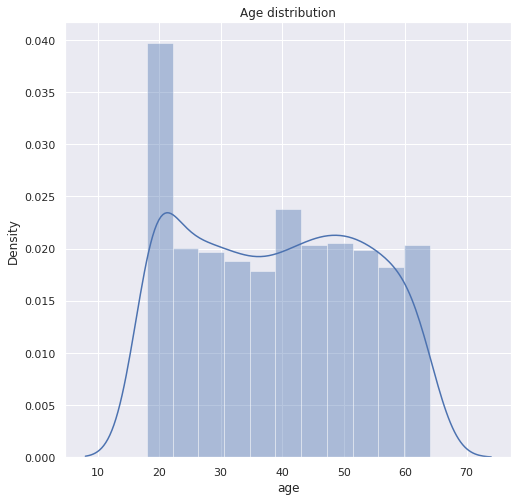

In [ ]:
# distribution of age
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show()

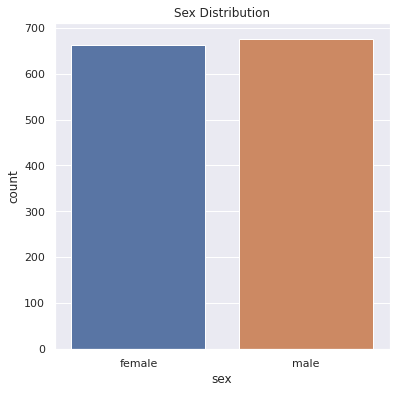

In [ ]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

<ipython-input-8-f6f3b345abd0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


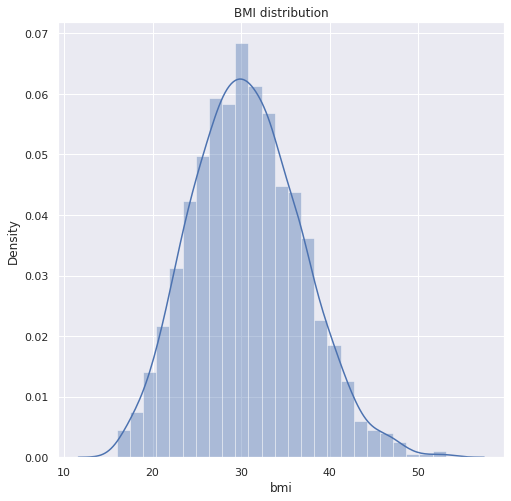

In [ ]:
#BMI distribution
plt.figure(figsize=(8,8))
sns.distplot(df['bmi'])
plt.title('BMI distribution')
plt.show()

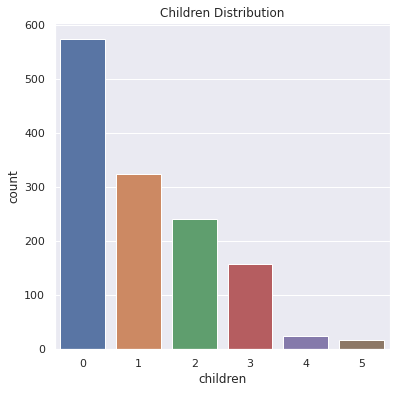

In [ ]:
#Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children Distribution')
plt.show()

In [ ]:
#smoker column
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

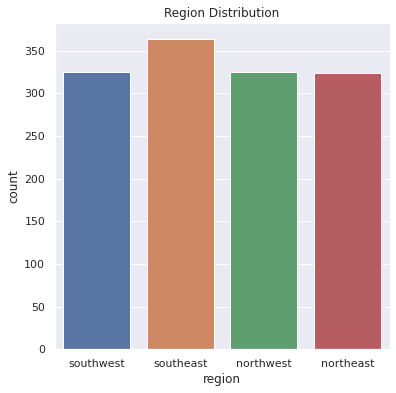

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()
df['region'].value_counts()

<ipython-input-12-c362cf8b4868>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


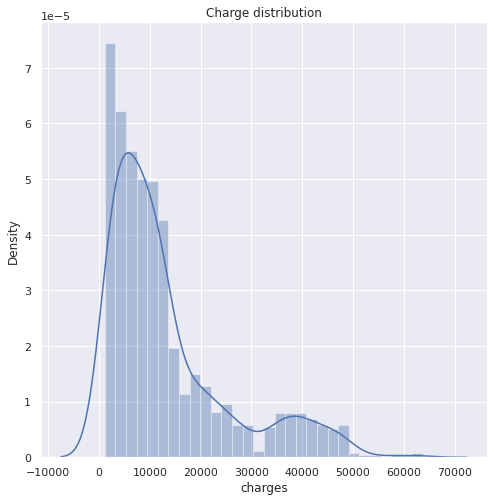

In [ ]:
# Distribution of Charges value
plt.figure(figsize=(8,8))
sns.distplot(df['charges'])
plt.title('Charge distribution')
plt.show()

Data Processing and Encoding

In [ ]:
#encoding sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding region column
df.replace({'region':{'southeast':0,
                      'southwest':1,
                      'northeast':2,
                      'northwest':3}}, inplace=True)


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


Splitting The Dataset

In [ ]:
X = df.drop(columns='charges', axis=1)
y = df['charges']


In [ ]:
print(X)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [ ]:
#loading the linear reg model
reg = LinearRegression()

In [ ]:
#Fit the training data into the model
reg.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [ ]:
#prediction on test data
y_pred = reg.predict(X_test)

#R Squared Value
r2_score = metrics.r2_score(y_test, y_pred)
print(r2_score)

0.7447273869684076
